# Triple Exponential Model

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [2]:
data=pd.read_csv(r"C:\Users\User\Desktop\Python Code\Time Series - IMS Student\Python\AirPassenger.csv")
data.head(3)

,Date,Passenger
0,01-01-1949,112
1,01-02-1949,118
2,01-03-1949,132


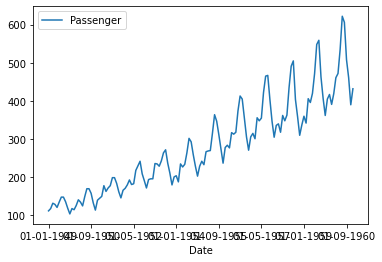

In [3]:
data.plot.line(x = 'Date',y = 'Passenger')
plt.show()

In [4]:
data2=data.set_index("Date")
data2.head()

,Passenger
Date,
01-01-1949,112
01-02-1949,118
01-03-1949,132
01-04-1949,129
01-05-1949,121


abc=np.array([0.88,0.93,1.04,1.02,0.96,1.07,1.17,1.17,1.07,0.94,0.82,0.93])

#### Auto Model

In [5]:
model2 = ExponentialSmoothing(data2,trend='add',seasonal='mul',seasonal_periods=12).fit()
model2.params
          # initial_seasons=np.array([0.88,0.93,1.04,1.02,0.96,1.07,1.17,1.17,1.07,0.94,0.82,0.93]))

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


{'smoothing_level': 0.3185898660259786,
 'smoothing_trend': 2.382517469297811e-09,
 'smoothing_seasonal': 0.6013524400244354,
 'damping_trend': nan,
 'initial_level': 197.62286615433473,
 'initial_trend': 4.646997623764819,
 'initial_seasons': array([0.55084182, 0.57930085, 0.63970012, 0.6102315 , 0.56967126,
        0.62211857, 0.67648936, 0.66818491, 0.60919276, 0.53142518,
        0.4705981 , 0.53898757]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [6]:
model2.fittedvalues

Date
01-01-1949    111.418700
01-02-1949    120.061878
01-03-1949    134.827114
01-04-1949    130.592674
01-05-1949    124.086150
                 ...    
01-08-1960    625.009601
01-09-1960    506.745061
01-10-1960    443.213423
01-11-1960    393.494076
01-12-1960    432.351430
Length: 144, dtype: float64

In [7]:
df = pd.DataFrame(
    np.c_[data.Passenger, model2.level, model2.trend, model2.season,model2.fittedvalues],
    columns=["Actual","Level","Trend","Seasonal","Forecast"])
df

,Actual,Level,Trend,Seasonal,Forecast
0,112.0,202.606070,4.646998,0.552570,111.418700
1,118.0,206.119126,4.646998,0.573318,120.061878
2,132.0,209.358136,4.646998,0.631634,134.827114
3,129.0,213.173630,4.646998,0.605756,130.592674
4,121.0,216.094691,4.646998,0.561151,124.086150
...,...,...,...,...,...
139,606.0,829.210474,4.646998,0.732785,625.009601
140,508.0,834.515367,4.646998,0.608617,506.745061
141,461.0,849.891320,4.646998,0.540908,443.213423
142,390.0,852.120867,4.646998,0.458017,393.494076


### Auto model 

In [8]:
Forecast2 = model2.forecast(24)
Forecast2

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


144    445.242731
145    418.225788
146    465.310384
147    494.952052
148    505.476789
149    573.313810
150    663.597881
151    654.905667
152    546.762510
153    488.448335
154    415.724888
155    460.379684
156    474.073090
157    445.161401
158    495.118474
159    526.490642
160    537.515892
161    609.461756
162    705.219627
163    695.768644
164    580.701403
165    518.611499
166    441.265723
167    488.519900
dtype: float64

#### Forecast Plot

<AxesSubplot:xlabel='Date'>

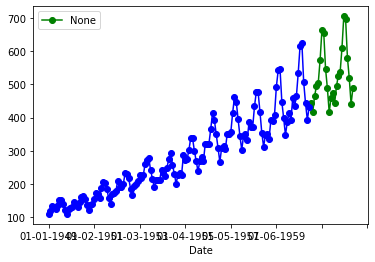

In [9]:
# plot
Forecast2.plot(marker='o', color='green', legend=True)
model2.fittedvalues.plot(marker='o',  color='blue')

In [10]:
data2["Forecast"]=model2.fittedvalues
data2.head()

,Passenger,Forecast
Date,,
01-01-1949,112,111.418700
01-02-1949,118,120.061878
01-03-1949,132,134.827114
01-04-1949,129,130.592674
01-05-1949,121,124.086150


#### Accuracy of Model

In [11]:
mean_absolute_percentage_error = np.mean(np.abs(data2.Passenger - data2.Forecast)/np.abs(data2.Passenger))*100
mean_absolute_percentage_error

3.083945963512664

# Finished 